# MC030 - Projeto final de Graduação
## Análise e Previsão do Mercado de Ações

## Descrição do modelo

A partir de um conjunto de cotações diárias de dólar para real (USD-BRL) desejamos modelar esse comportamento a partir de uma série de indicadores de mercado financeiro para classificarmos cada dia como um momento de compra ou momento de venda.

# ...

# Código

### Definindo endpoints da API (https://www.alphavantage.co/documentation/)

In [4]:
apiToken = '3GX5M109KQK9B6HO'
baseUrl = 'https://www.alphavantage.co/query?&outputsize=full&apikey=' + apiToken
usdBrlUrl = 'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=USD&to_symbol=BRL&outputsize=full&apikey=' + apiToken
stockUrl = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=demo'

### Obtendo dados da API

In [5]:
import requests
import json
import time
callsMade = 0
def incrementAndVerifyCallsMade():
    global callsMade
    if callsMade == 5:
        print('Made 5 requests to the API in the last minute - sleeping for 1 minute')
        time.sleep(65)
        callsMade = 0
    callsMade += 1
def parsePriceRetrieved(stocksRetrieved):
    stockPrices = {}
    for date, candle in stocksRetrieved.items():
        stockPrices[date] = candle['1. open']
    return stockPrices
def parseIndicatorRetrieved(indicatorsRetrieved):
    indicatorValues = {}
    for date, indicator in indicatorsRetrieved.items():
        for indicatorSymbol, indicatorValue in indicator.items():
            if indicatorSymbol == 'Chaikin A/D':
                indicatorSymbol = 'AD'
            elif indicatorSymbol == 'MACD_Signal' or indicatorSymbol == 'MACD_Hist':
                continue
            indicatorValues[date] = {indicatorSymbol: indicatorValue}
    return indicatorValues
# returns [{date: price}]
def getStockPrice(stockSymbol):
    stockUrl = baseUrl + '&function=TIME_SERIES_DAILY&symbol=' + stockSymbol
    print('Fetching ' + stockUrl)
    incrementAndVerifyCallsMade()
    stocksRetrieved = requests.get(stockUrl).json();
    stocks = parsePriceRetrieved(stocksRetrieved['Time Series (Daily)'])
    print('Retrieved and parsed '+ stockUrl)
    return stocks
# returns [{date: price}]
def getForexPrice(fromSymbol, toSymbol):
    forexUrl = baseUrl + '&function=FX_DAILY&from_symbol=' + fromSymbol + '&to_symbol=' + toSymbol
    print('Fetching ' + forexUrl)
    incrementAndVerifyCallsMade()
    forexRetrieved = requests.get(forexUrl).json();
    forex = parsePriceRetrieved(forexRetrieved)
    print('Retrieved and parsed '+ forexUrl)
    return forex
# returns [date: [{indicatorFunction: indicatorValue}]]
def getIndicator(indicatorFunction, symbol):
    indicatorUrl = baseUrl + '&interval=daily&series_type=open&function=' + indicatorFunction + '&symbol=' + symbol
    if indicatorFunction=='SMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='EMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='WMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='DEMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TEMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TRIMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='KAMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MAMA':
        indicatorUrl += '&fastlimit=0.01&slowlimit=0.01'
    elif indicatorFunction=='T3':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MACD':
        indicatorUrl += '&fastperiod=12&slowperiod=26&signalperiod=9'
    elif indicatorFunction=='MACDEXT':
        indicatorUrl += '&fastperiod=12&slowperiod=26&signalperiod=9&fastmatype=0&slowmatype=0&signalmatype=0'
    elif indicatorFunction=='STOCH':
        indicatorUrl += '&fastkperiod=5&slowkperiod=3&slowdperiod=3&slowkmatype=0&slowdmatype=0'
    elif indicatorFunction=='STOCHF':
        indicatorUrl += '&fastkperiod=5&fastdperiod=3&fastdmatype=0'
    elif indicatorFunction=='RSI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='STOCHRSI':
        indicatorUrl += '&time_period=10&fastkperiod=5&fastdperiod=3&fastdmatype=0'
    elif indicatorFunction=='WILLR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ADX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ADXR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='APO':
        indicatorUrl += '&fastperiod=12&slowperiod=26&matype=0'
    elif indicatorFunction=='PPO':
        indicatorUrl += '&fastperiod=12&slowperiod=26&matype=0'
    elif indicatorFunction=='MOM':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='BOP':
        indicatorUrl += ''
    elif indicatorFunction=='CCI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='CMO':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='CCI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ROC':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ROCR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='AROON':
        indicatorUrl += '&time_period=14'
    elif indicatorFunction=='AROONOSC':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MFI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TRIX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ULTOSC':
        indicatorUrl += '&timeperiod1=7&timeperiod2=14&timeperiod3=28'
    elif indicatorFunction=='DX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='AD':
        indicatorUrl += ''
        indicatorFunction = 'Chaikin A/D'
    elif indicatorFunction=='OBV':
        indicatorUrl += ''
    # TODO: terminar isso aqi
    print('Fetching ' + indicatorUrl)
    incrementAndVerifyCallsMade();
    indicatorRetrieved = requests.get(indicatorUrl).json()
    indicators = parseIndicatorRetrieved(indicatorRetrieved['Technical Analysis: ' + indicatorFunction])
    print('Retrieved and parsed '+ indicatorUrl)
    return indicators
# returns [date: [{indicatorFunction: indicatorValue}]]
def getIndicatorList(indicatorFunctions, symbol):
    indicators = {}
    for indicatorFunction in indicatorFunctions:
        indicatorDict = getIndicator(indicatorFunction, symbol)
        for date, indicator in indicatorDict.items():
            for indicatorFunction, indicatorValue in indicator.items():
                if  date not in indicators:
                    indicators[date] = {}
                indicators[date][indicatorFunction] = indicatorValue
    return indicators

In [6]:
# Filtrando dados válidos - apenas aqueles cujas datas estão na lista de preços e de indicadores
def filterData(prices, indicators, indicatorFunctions):
    filteredPrices = {date: price for date, price in prices.items() if date in indicators.keys()}
    filteredIndicators = {date: indicators for date, indicators in indicators.items() if date in prices.keys()}
    return filteredPrices, filteredIndicators

def getData(stockSymbol, indicatorFunctions):
    stockPrices = getStockPrice(stockSymbol)
    indicators = getIndicatorList(indicatorFunctions, stockSymbol)
    stockPrices, indicators = filterData(stockPrices, indicators, indicatorFunctions)
    return stockPrices, indicators

def getForexData(fromForexSymbol, toForexSymbol, indicatorFunctions):
    forexPrices = getForexPrice(fromForexSymbol, toForexSymbol)
    indicators = getIndicatorList(indicatorFunctions, fromForexSymbol + toForexSymbol)
    forexPrices, indicators = filterData(forexPrices, indicators)
    return forexPrices, indicators

### Métodos de anotação de dados

In [145]:
import collections

def annotateBuyOrSellTwoClasses(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    earlierDate = ''
    last = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = float(value)
        break
    for date, price in prices.items():
        if float(price) > yesterdayPrice:
            dateAnnotated[yesterdayDate] = 'B'
            last = 'B'
        elif float(price) < yesterdayPrice:
            dateAnnotated[yesterdayDate] = 'S'
            last = 'S'
        else:
            dateAnnotated[yesterdayDate] = last
        yesterdayDate = date
        yesterdayPrice = float(price)
    return dateAnnotated

def annotateBuyOrSellEightClasses(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    earlierDate = ''
    last = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = float(value)
        break
    for date, price in prices.items():
        if float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.005:
            dateAnnotated[yesterdayDate] = 'B0'
            last = 'B0'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.01:
            dateAnnotated[yesterdayDate] = 'B1'
            last = 'B1'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.02:
            dateAnnotated[yesterdayDate] = 'B2'
            last = 'B2'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice > 1.02:
            dateAnnotated[yesterdayDate] = 'B3'
            last = 'B3'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .995:
            dateAnnotated[yesterdayDate] = 'S0'
            last = 'S0'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .99:
            dateAnnotated[yesterdayDate] = 'S1'
            last = 'S1'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .98:
            dateAnnotated[yesterdayDate] = 'S2'
            last = 'S2'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice < .98:
            dateAnnotated[yesterdayDate] = 'S3'
            last = 'S3'
        else:
            dateAnnotated[yesterdayDate] = last
        yesterdayDate = date
        yesterdayPrice = float(price)
    return dateAnnotated

def annotateMaxProfit(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    yesterdayPrice = 0
    currentStatus = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = value
        break
    for date, price in prices.items():
        if price > yesterdayPrice and currentStatus != 'B':
            dateAnnotated[yesterdayDate] = 'B'
            currentStatus = 'B'
        elif price < yesterdayPrice and currentStatus != 'S':
            dateAnnotated[yesterdayDate] = 'S'
            currentStatus = 'S'
        yesterdayDate = date
        yesterdayPrice = price
    return dateAnnotated

### Normalização dos dados

In [121]:
# Dúvida - como faremos a normalização?
# Ideia: normalizarmos de acordo com o preço da ação no momento

# Exemplo: temos o valor de uma ação atualmente em R$3.00, mas sua média dos últimos 10 dias é de R$2.90,
# logo esta ação está aumentando de valor. Se normalizarmos todos os indicadores de acordo com o preço atual
# da ação podemos ter mais sucesso, pois no momento de atuação do modelo tudo que ele terá acesso será o preço 
# atual da ação e seus indicadores... Normalizar de acordo com um teto e piso de valores acho que pode dar ruim.

import copy

# Normaliza um conjunto de indicadores a partir do preço da ação
def normalizeIndicators(indicatorSet, stockPrice):
    normalizedIndicatorSet = {}
    for indicatorFunction, indicatorValue in indicatorSet.items():
        normalizedIndicatorSet[indicatorFunction] = float(indicatorValue)/float(stockPrice)
    return normalizedIndicatorSet

# Retorna os indicadores normalizados: indicadores = [date: {indicators: ['SMA': 0.89, 'EMA': 0.93], annotation: 'B'}]
def getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotated):
    print('Normalizing and annotating indicators')
    indicatorsAnnotated = {}
    for date, annotation in dateAnnotated.items():
        if date not in indicatorsAnnotated:
            indicatorsAnnotated[date] = {'indicators': {}, 'annotation': ''}
        indicatorsAnnotated[date]['indicators'] = normalizeIndicators(indicators[date], stockPrices[date])
        indicatorsAnnotated[date]['annotation'] = annotation
    return indicatorsAnnotated

# Deprecated
def normalizeIndicatorsOld(indicatorsAnnotated):
    normalizedIndicators = {'B': [], 'S': []}
    for indicatorSet in indicatorsAnnotated['B']:
        normalizedIndicatorSet = []
        for indicator, value in indicatorSet.items():
            print(indicator)
            normalizedIndicatorSet.append({indicator: value/1000})
        normalizedIndicators[B].append(normalizedIndicatorSet)
    for indicators in indicatorsAnnotated['S']:
        print(indicators)

### Machine Learning

In [ ]:
import keras
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

def getModelMLP(n_steps, n_features, n_outputs):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, activation='relu', input_shape=(n_steps*n_features,)))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])
    return model

def getModelBidirectionalLSTM(n_steps, n_features, n_outputs):    
    model = keras.models.Sequential()
    model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation='relu'), input_shape=(n_steps, n_features)))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])
    return model

def getModelCNN(n_steps, n_features):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(50, activation='relu'))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    return model

### Análise de dados

In [455]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm

### Main

In [113]:
# Cheat-sheet com os simbolos
__indicatorSymbols = ['SMA', 'EMA', 'WMA', 'DEMA', 'TEMA', 'TRIMA', 'KAMA', 'MAMA',
                      'T3', 'MACD', 'MACDEXT', 'STOCH', 'STOCHF', 'RSI', 'STOCHRSI', 'WILLR', 
                      'ADX', 'ADXR', 'APO', 'PPO', 'MOM', 'BOP', 'CCI', 'CMO', 'ROC', 'ROCR',
                      'AROON', 'AROONOSC', 'MFI', 'TRIX', 'ULTOSC', 'DX', 'MINUS_DI', 'PLUS_DI',
                      'MINUS_DM', 'PLUS_DM', 'BBANDS', 'MIDPOINT', 'SAR', 'TRANGE', 'ATR',
                      'NATR', 'AD', 'ADOSC', 'OBV', 'HT_TRENDLINE', 'HT_SINE', 'HT_TRENDMODE',
                      'HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR']
__forexSymbols = ['BRL', 'EUR']
__stockSymbols = ['MSFT']

# Definindo simbolos para o modelo
indicatorFunctions = ['SMA', 'EMA', 'WMA']
# fromForexSymbol = 'USD'
# toForexSymbol = 'BRL'
stockSymbol = 'MSFT'

stockPrices, indicators = getData(stockSymbol, indicatorFunctions)
# forexPrices, indicators = getForexData(fromForexSymbol, toForexSymbol, indicatorFunctions)
# dateAnnotated = annotateMaxProfit(stockPrices)

Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&function=TIME_SERIES_DAILY&symbol=MSFT
Retrieved and parsed https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&function=TIME_SERIES_DAILY&symbol=MSFT
Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=SMA&symbol=MSFT&time_period=10
Retrieved and parsed https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=SMA&symbol=MSFT&time_period=10
Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=EMA&symbol=MSFT&time_period=10
Made 5 requests to the API in the last minute - sleeping for 1 minute
Retrieved and parsed https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=EMA&symbol=MSFT&time_period=10
Fetching https://www.alp

In [139]:
df = pd.DataFrame.from_dict(stockPrices, orient='index')

div = df[0].astype('float').div(df[0].astype('float').shift(-1))

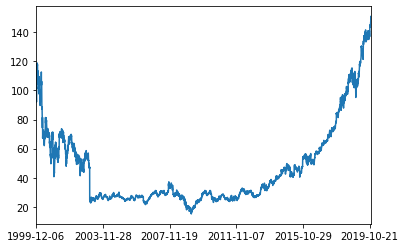

In [140]:
df.sort_index(inplace=True)
df[0].astype('float').plot()

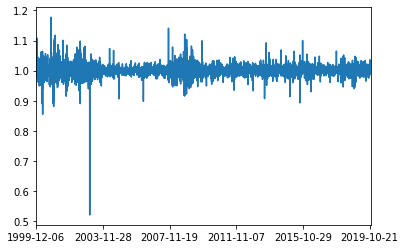

In [141]:
div.sort_index(inplace=True)
div.plot()

In [142]:
div.describe(percentiles=[.01,.1,.25,.5,.75,.9,.95,.99])

count    5023.000000
mean        1.000294
std         0.019655
min         0.521058
1%          0.951059
10%         0.981563
25%         0.991775
50%         1.000357
75%         1.008583
90%         1.019582
95%         1.027347
99%         1.053370
max         1.177592
Name: 0, dtype: float64

In [148]:
dateAnnotatedTwo = annotateBuyOrSellTwoClasses(stockPrices)
df = pd.DataFrame.from_dict(dateAnnotatedTwo, orient='index')
df[0].value_counts()

S    2567
B    2456
Name: 0, dtype: int64

In [149]:
dateAnnotatedEight = annotateBuyOrSellEightClasses(stockPrices)
df = pd.DataFrame.from_dict(dateAnnotatedEight, orient='index')
df[0].value_counts()

S0    835
B0    782
S2    641
S1    624
B2    612
B1    603
S3    467
B3    459
Name: 0, dtype: int64

In [156]:
import pandas as pd

normalizedIndicatorsTwo = getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotatedTwo)
normalizedIndicatorsEight = getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotatedEight)

dataTwo = pd.DataFrame.from_dict(normalizedIndicatorsTwo, orient='index')
dataEight = pd.DataFrame.from_dict(normalizedIndicatorsEight, orient='index')

Normalizing and annotating indicators
Normalizing and annotating indicators


In [157]:
dataTwo = pd.DataFrame.merge(pd.DataFrame(dataTwo.indicators.values.tolist(), index=dataTwo.index), dataTwo, left_index=True, right_index=True, how='outer').drop(columns=['indicators'])
dataEight = pd.DataFrame.merge(pd.DataFrame(dataEight.indicators.values.tolist(), index=dataEight.index), dataEight, left_index=True, right_index=True, how='outer').drop(columns=['indicators'])

In [158]:
dataTwo.head(), dataEight.head()

(                 SMA       EMA       WMA annotation
 2019-11-21  0.989926  0.991931  0.997135          B
 2019-11-20  0.980234  0.984143  0.988606          B
 2019-11-19  0.972594  0.976915  0.980575          S
 2019-11-18  0.973906  0.977031  0.980141          S
 2019-11-15  0.977842  0.979366  0.982223          S,
                  SMA       EMA       WMA annotation
 2019-11-21  0.989926  0.991931  0.997135         B1
 2019-11-20  0.980234  0.984143  0.988606         B0
 2019-11-19  0.972594  0.976915  0.980575         S1
 2019-11-18  0.973906  0.977031  0.980141         S1
 2019-11-15  0.977842  0.979366  0.982223         S2)

In [159]:
dataTwo.annotation = dataTwo.annotation.apply(lambda x: 0 if x == 'S' else 1)

eight_dict = {"B3":0, "B2": 1, "B1": 2, "B0": 3, "S0": 4, "S1": 5, "S2": 6, "S3": 7}
dataEight.annotation = dataEight.annotation.apply(lambda x: eight_dict[x])

In [160]:
dataTwo = dataTwo.sort_index()
dataEight = dataEight.sort_index()

In [372]:
import numpy as np
import matplotlib.pyplot as plt

n_steps = 4
n_indicators = 3

batch_size = 32
train_split = .8

X = {
    "mlp": {
        2 : [],
        8 : [] 
    },
    "lstm": {
        2 : [],
        8 : []
    }
}
y = {
    2 : [],
    8 : [] 
}

for i in range(len(dataTwo)):
    end_ix = i + n_steps
    if end_ix > len(dataTwo):
        break
    seq_x, seq_y = dataTwo.iloc[i:end_ix, :-1].values, dataTwo.iloc[end_ix-1, -1]
    X["lstm"][2].append(seq_x)
    X["mlp"][2].append(seq_x.flatten())
    y[2].append(seq_y)
    
for i in range(len(dataEight)):
    end_ix = i + n_steps
    if end_ix > len(dataEight):
        break
    seq_x, seq_y = dataEight.iloc[i:end_ix, :-1].values, dataEight.iloc[end_ix-1, -1]
    X["lstm"][8].append(seq_x)
    X["mlp"][8].append(seq_x.flatten())
    y[8].append(np.eye(8)[seq_y])

X["lstm"][2] = np.array(X["lstm"][2])
X["mlp"][2] = np.array(X["mlp"][2])
y[2] = np.array(y[2])

X["lstm"][8] = np.array(X["lstm"][8])
X["mlp"][8] = np.array(X["mlp"][8])
y[8] = np.array(y[8])

In [328]:
dataTwo.head()

,SMA,EMA,WMA,annotation
1999-12-07,0.971239,0.972042,0.982787,1
1999-12-08,0.992348,0.991003,1.002084,1
1999-12-09,1.007132,1.002554,1.013524,1
1999-12-10,0.994175,0.990011,0.999999,0
1999-12-13,0.995412,0.989802,0.999010,0


In [329]:
X["lstm"][2][0]

array([[0.97123905, 0.97204222, 0.98278734],
       [0.99234792, 0.99100349, 1.0020843 ],
       [1.00713152, 1.00255435, 1.01352391],
       [0.9941751 , 0.99001124, 0.99999893]])

In [330]:
X["mlp"][2][0]

array([0.97123905, 0.97204222, 0.98278734, 0.99234792, 0.99100349,
       1.0020843 , 1.00713152, 1.00255435, 1.01352391, 0.9941751 ,
       0.99001124, 0.99999893])

In [331]:
len(X["lstm"][2])

5020

In [413]:
from sklearn.model_selection import train_test_split

X_train = {
    "mlp": {
    },
    "lstm": {
        2 : X["lstm"][2][:int(len(X["lstm"][2]) * train_split)],
        8 : X["lstm"][8][:int(len(X["lstm"][8]) * train_split)]
    }
}

X_test = {
    "mlp": {
    },
    "lstm": {
        2 : X["lstm"][2][int(len(X["lstm"][2]) * train_split):],
        8 : X["lstm"][8][int(len(X["lstm"][8]) * train_split):]
    }
}

y_train = {
    "mlp": {
    },
    "lstm": {
        2 : y[2][:int(len(y[2]) * train_split)],
        8 : y[8][:int(len(y[8]) * train_split)] 
    }
}

y_test = {
    "mlp": {
    },
    "lstm": {
        2 : y[2][int(len(y[2]) * train_split):],
        8 : y[8][int(len(y[2]) * train_split):] 
    }
}


X_train["mlp"][2], X_test["mlp"][2], y_train["mlp"][2], y_test["mlp"][2] = train_test_split(X["mlp"][2], y[2], train_size=train_split, random_state=0)
X_train["mlp"][8], X_test["mlp"][8], y_train["mlp"][8], y_test["mlp"][8] = train_test_split(X["mlp"][8], y[8], train_size=train_split, random_state=0)

In [414]:
MLP_2 = getModelMLP(n_steps, n_indicators, 1)
MLP_8 = getModelMLP(n_steps, n_indicators, 8)

LSTM_2 = getModelBidirectionalLSTM(n_steps, n_indicators, 1)
LSTM_8 = getModelBidirectionalLSTM(n_steps, n_indicators, 8)

In [415]:
MLP_2, LSTM_2, MLP_8, LSTM_8

(<keras.engine.sequential.Sequential at 0x16a556610>,
 <keras.engine.sequential.Sequential at 0x16a6e4950>)

In [416]:
MLP_2.summary()

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 64)                832       
_________________________________________________________________
dropout_77 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_157 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_78 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [417]:
MLP_8.summary()

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 64)                832       
_________________________________________________________________
dropout_79 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_160 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_80 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_161 (Dense)            (None, 8)                 520       
Total params: 5,512
Trainable params: 5,512
Non-trainable params: 0
_________________________________________________________________


In [418]:
LSTM_2.summary()

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_39 (Bidirectio (None, 128)               34816     
_________________________________________________________________
dense_162 (Dense)            (None, 1)                 129       
Total params: 34,945
Trainable params: 34,945
Non-trainable params: 0
_________________________________________________________________


In [419]:
LSTM_8.summary()

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_40 (Bidirectio (None, 128)               34816     
_________________________________________________________________
dense_163 (Dense)            (None, 8)                 1032      
Total params: 35,848
Trainable params: 35,848
Non-trainable params: 0
_________________________________________________________________


In [453]:
preds = {
    "mlp": {2: [], 8:[]},
    "lstm": {2: [], 8:[]}
}

Train on 3212 samples, validate on 804 samples
Epoch 1/300
3212/3212 [==============================] - 0s 132us/step - loss: 0.7000 - accuracy: 0.5031 - val_loss: 0.6928 - val_accuracy: 0.5137
Epoch 2/300
3212/3212 [==============================] - 0s 50us/step - loss: 0.6922 - accuracy: 0.5299 - val_loss: 0.6922 - val_accuracy: 0.5149
Epoch 3/300
3212/3212 [==============================] - 0s 50us/step - loss: 0.6930 - accuracy: 0.5159 - val_loss: 0.6922 - val_accuracy: 0.4900
Epoch 4/300
3212/3212 [==============================] - 0s 56us/step - loss: 0.6935 - accuracy: 0.5081 - val_loss: 0.6909 - val_accuracy: 0.5149
Epoch 5/300
3212/3212 [==============================] - 0s 50us/step - loss: 0.6911 - accuracy: 0.5240 - val_loss: 0.6902 - val_accuracy: 0.5274
Epoch 6/300
3212/3212 [==============================] - 0s 48us/step - loss: 0.6916 - accuracy: 0.5115 - val_loss: 0.6911 - val_accuracy: 0.7363
Epoch 7/300
3212/3212 [==============================] - 0s 48us/step - loss

3212/3212 [==============================] - 0s 44us/step - loss: 0.5014 - accuracy: 0.7528 - val_loss: 0.4427 - val_accuracy: 0.8221
Epoch 57/300
3212/3212 [==============================] - 0s 46us/step - loss: 0.5006 - accuracy: 0.7568 - val_loss: 0.4308 - val_accuracy: 0.8507
Epoch 58/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.4841 - accuracy: 0.7709 - val_loss: 0.4201 - val_accuracy: 0.8445
Epoch 59/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.4769 - accuracy: 0.7762 - val_loss: 0.4166 - val_accuracy: 0.8333
Epoch 60/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.4693 - accuracy: 0.7842 - val_loss: 0.4004 - val_accuracy: 0.8545
Epoch 61/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.4704 - accuracy: 0.7755 - val_loss: 0.4124 - val_accuracy: 0.8308
Epoch 62/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.4542 - accuracy: 0.7967 - val_loss: 0.4012 - val_a

Epoch 112/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.3837 - accuracy: 0.8285 - val_loss: 0.3070 - val_accuracy: 0.8669
Epoch 113/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.3724 - accuracy: 0.8344 - val_loss: 0.2952 - val_accuracy: 0.8968
Epoch 114/300
3212/3212 [==============================] - 0s 50us/step - loss: 0.3859 - accuracy: 0.8288 - val_loss: 0.3182 - val_accuracy: 0.8806
Epoch 115/300
3212/3212 [==============================] - 0s 56us/step - loss: 0.3734 - accuracy: 0.8272 - val_loss: 0.2571 - val_accuracy: 0.9154
Epoch 116/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.3600 - accuracy: 0.8369 - val_loss: 0.2440 - val_accuracy: 0.9353
Epoch 117/300
3212/3212 [==============================] - 0s 47us/step - loss: 0.3684 - accuracy: 0.8306 - val_loss: 0.3254 - val_accuracy: 0.8433
Epoch 118/300
3212/3212 [==============================] - 0s 53us/step - loss: 0.3940 - accuracy: 0.8101 - val_

3212/3212 [==============================] - 0s 48us/step - loss: 0.2859 - accuracy: 0.8736 - val_loss: 0.2011 - val_accuracy: 0.9291
Epoch 168/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.2772 - accuracy: 0.8789 - val_loss: 0.1958 - val_accuracy: 0.9453
Epoch 169/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.3067 - accuracy: 0.8714 - val_loss: 0.1929 - val_accuracy: 0.9316
Epoch 170/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.3154 - accuracy: 0.8562 - val_loss: 0.2682 - val_accuracy: 0.8756
Epoch 171/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.3256 - accuracy: 0.8521 - val_loss: 0.2000 - val_accuracy: 0.9353
Epoch 172/300
3212/3212 [==============================] - 0s 46us/step - loss: 0.3095 - accuracy: 0.8587 - val_loss: 0.2201 - val_accuracy: 0.9490
Epoch 173/300
3212/3212 [==============================] - 0s 46us/step - loss: 0.2958 - accuracy: 0.8702 - val_loss: 0.2451 -

3212/3212 [==============================] - 0s 47us/step - loss: 0.3135 - accuracy: 0.8618 - val_loss: 0.2823 - val_accuracy: 0.8470
Epoch 223/300
3212/3212 [==============================] - 0s 51us/step - loss: 0.3077 - accuracy: 0.8633 - val_loss: 0.1735 - val_accuracy: 0.9515
Epoch 224/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.2832 - accuracy: 0.8745 - val_loss: 0.1835 - val_accuracy: 0.9341
Epoch 225/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.2974 - accuracy: 0.8783 - val_loss: 0.2377 - val_accuracy: 0.9055
Epoch 226/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.3679 - accuracy: 0.8257 - val_loss: 0.3595 - val_accuracy: 0.8072
Epoch 227/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.3891 - accuracy: 0.8210 - val_loss: 0.2343 - val_accuracy: 0.9353
Epoch 228/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.3123 - accuracy: 0.8605 - val_loss: 0.2138 -

3212/3212 [==============================] - 0s 45us/step - loss: 0.3439 - accuracy: 0.8285 - val_loss: 0.2545 - val_accuracy: 0.8930
Epoch 278/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.3385 - accuracy: 0.8303 - val_loss: 0.3367 - val_accuracy: 0.8221
Epoch 279/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.3641 - accuracy: 0.8120 - val_loss: 0.2374 - val_accuracy: 0.9117
Epoch 280/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.3528 - accuracy: 0.8176 - val_loss: 0.1960 - val_accuracy: 0.9303
Epoch 281/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.3228 - accuracy: 0.8478 - val_loss: 0.1862 - val_accuracy: 0.9341
Epoch 282/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.3947 - accuracy: 0.8042 - val_loss: 0.3141 - val_accuracy: 0.8396
Epoch 283/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.3730 - accuracy: 0.8135 - val_loss: 0.1979 -

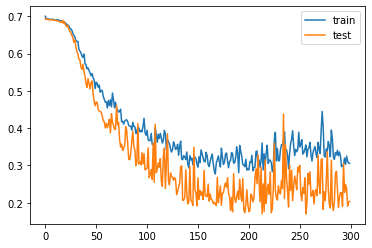

In [421]:
history_mlp_2 = MLP_2.fit(X_train["mlp"][2], y_train["mlp"][2], epochs=300, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_mlp_2.history['loss'], label='train')
plt.plot(history_mlp_2.history['val_loss'], label='test')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           S       0.91      0.95      0.93       502
           B       0.95      0.90      0.93       502

    accuracy                           0.93      1004
   macro avg       0.93      0.93      0.93      1004
weighted avg       0.93      0.93      0.93      1004

Confusion matrix, without normalization
[[477  25]
 [ 48 454]]


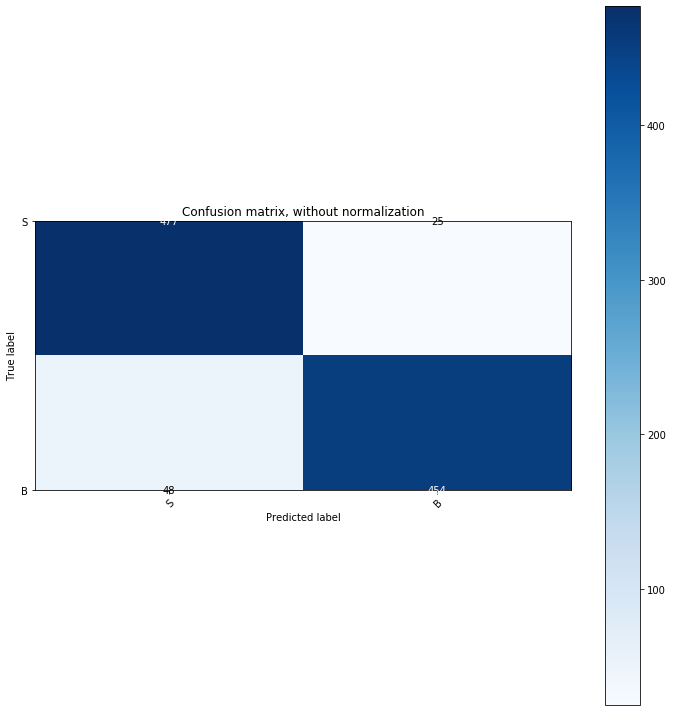

In [456]:
preds["mlp"][2] = MLP_2.predict(X_test["mlp"][2], batch_size=batch_size)
print(classification_report(y_test["mlp"][2], np.rint(preds["mlp"][2]).astype(np.int64), target_names=["S","B"], digits=5))
conf = plot_confusion_matrix(y_test["mlp"][2], np.rint(preds["mlp"][2]).astype(np.int64), classes=np.array(["S","B"]))

Train on 3212 samples, validate on 804 samples
Epoch 1/300
3212/3212 [==============================] - 0s 51us/step - loss: 1.1172 - accuracy: 0.5380 - val_loss: 0.9175 - val_accuracy: 0.7587
Epoch 2/300
3212/3212 [==============================] - 0s 49us/step - loss: 1.1330 - accuracy: 0.5246 - val_loss: 0.9159 - val_accuracy: 0.7463
Epoch 3/300
3212/3212 [==============================] - 0s 46us/step - loss: 1.1227 - accuracy: 0.5299 - val_loss: 0.9088 - val_accuracy: 0.7910
Epoch 4/300
3212/3212 [==============================] - 0s 46us/step - loss: 1.1357 - accuracy: 0.5153 - val_loss: 0.9082 - val_accuracy: 0.7861
Epoch 5/300
3212/3212 [==============================] - 0s 46us/step - loss: 1.1016 - accuracy: 0.5483 - val_loss: 0.9075 - val_accuracy: 0.7898
Epoch 6/300
3212/3212 [==============================] - 0s 48us/step - loss: 1.0940 - accuracy: 0.5408 - val_loss: 0.8727 - val_accuracy: 0.7973
Epoch 7/300
3212/3212 [==============================] - 0s 47us/step - loss:

3212/3212 [==============================] - 0s 45us/step - loss: 1.0570 - accuracy: 0.5660 - val_loss: 0.8990 - val_accuracy: 0.6878
Epoch 57/300
3212/3212 [==============================] - 0s 45us/step - loss: 1.0853 - accuracy: 0.5408 - val_loss: 0.9381 - val_accuracy: 0.6617
Epoch 58/300
3212/3212 [==============================] - 0s 43us/step - loss: 1.0679 - accuracy: 0.5567 - val_loss: 0.8408 - val_accuracy: 0.7973
Epoch 59/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.1202 - accuracy: 0.5268 - val_loss: 0.9319 - val_accuracy: 0.7711
Epoch 60/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.0924 - accuracy: 0.5414 - val_loss: 0.8780 - val_accuracy: 0.7214
Epoch 61/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.0861 - accuracy: 0.5433 - val_loss: 0.8914 - val_accuracy: 0.7612
Epoch 62/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.0628 - accuracy: 0.5654 - val_loss: 0.9225 - val_a

Epoch 112/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.0260 - accuracy: 0.5704 - val_loss: 0.8037 - val_accuracy: 0.8221
Epoch 113/300
3212/3212 [==============================] - 0s 43us/step - loss: 1.0332 - accuracy: 0.5651 - val_loss: 0.8165 - val_accuracy: 0.8184
Epoch 114/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.0326 - accuracy: 0.5644 - val_loss: 0.9581 - val_accuracy: 0.7463
Epoch 115/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.0302 - accuracy: 0.5651 - val_loss: 0.9235 - val_accuracy: 0.7065
Epoch 116/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.0599 - accuracy: 0.5672 - val_loss: 0.8342 - val_accuracy: 0.7488
Epoch 117/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.0643 - accuracy: 0.5632 - val_loss: 0.9383 - val_accuracy: 0.7065
Epoch 118/300
3212/3212 [==============================] - 0s 45us/step - loss: 1.0544 - accuracy: 0.5504 - val_

3212/3212 [==============================] - 0s 43us/step - loss: 1.0431 - accuracy: 0.5638 - val_loss: 0.8480 - val_accuracy: 0.7015
Epoch 168/300
3212/3212 [==============================] - 0s 40us/step - loss: 1.0058 - accuracy: 0.5803 - val_loss: 0.8143 - val_accuracy: 0.7699
Epoch 169/300
3212/3212 [==============================] - 0s 41us/step - loss: 1.0173 - accuracy: 0.5828 - val_loss: 0.8758 - val_accuracy: 0.7550
Epoch 170/300
3212/3212 [==============================] - 0s 40us/step - loss: 1.0249 - accuracy: 0.5620 - val_loss: 0.8417 - val_accuracy: 0.8159
Epoch 171/300
3212/3212 [==============================] - 0s 46us/step - loss: 1.0377 - accuracy: 0.5725 - val_loss: 0.8120 - val_accuracy: 0.7935
Epoch 172/300
3212/3212 [==============================] - 0s 50us/step - loss: 1.0115 - accuracy: 0.5940 - val_loss: 0.8423 - val_accuracy: 0.7214
Epoch 173/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.9870 - accuracy: 0.5937 - val_loss: 0.7991 -

3212/3212 [==============================] - 0s 41us/step - loss: 0.9836 - accuracy: 0.5806 - val_loss: 0.8014 - val_accuracy: 0.7761
Epoch 223/300
3212/3212 [==============================] - 0s 41us/step - loss: 0.9870 - accuracy: 0.5968 - val_loss: 0.7692 - val_accuracy: 0.7662
Epoch 224/300
3212/3212 [==============================] - 0s 41us/step - loss: 0.9921 - accuracy: 0.5872 - val_loss: 0.7808 - val_accuracy: 0.8246
Epoch 225/300
3212/3212 [==============================] - 0s 41us/step - loss: 0.9985 - accuracy: 0.5878 - val_loss: 0.8106 - val_accuracy: 0.7861
Epoch 226/300
3212/3212 [==============================] - 0s 42us/step - loss: 0.9782 - accuracy: 0.5862 - val_loss: 0.7721 - val_accuracy: 0.7799
Epoch 227/300
3212/3212 [==============================] - 0s 41us/step - loss: 1.0208 - accuracy: 0.5847 - val_loss: 0.9652 - val_accuracy: 0.5622
Epoch 228/300
3212/3212 [==============================] - 0s 42us/step - loss: 0.9820 - accuracy: 0.5890 - val_loss: 0.8376 -

3212/3212 [==============================] - 0s 45us/step - loss: 0.9757 - accuracy: 0.5847 - val_loss: 0.8001 - val_accuracy: 0.7923
Epoch 278/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.9751 - accuracy: 0.5909 - val_loss: 0.8267 - val_accuracy: 0.7015
Epoch 279/300
3212/3212 [==============================] - 0s 57us/step - loss: 0.9783 - accuracy: 0.5894 - val_loss: 0.7837 - val_accuracy: 0.7587
Epoch 280/300
3212/3212 [==============================] - 0s 53us/step - loss: 0.9705 - accuracy: 0.5968 - val_loss: 0.7933 - val_accuracy: 0.7550
Epoch 281/300
3212/3212 [==============================] - 0s 51us/step - loss: 0.9389 - accuracy: 0.6183 - val_loss: 0.7895 - val_accuracy: 0.7512
Epoch 282/300
3212/3212 [==============================] - 0s 64us/step - loss: 1.0068 - accuracy: 0.5772 - val_loss: 0.9037 - val_accuracy: 0.6617
Epoch 283/300
3212/3212 [==============================] - 0s 58us/step - loss: 0.9970 - accuracy: 0.5763 - val_loss: 0.8337 -

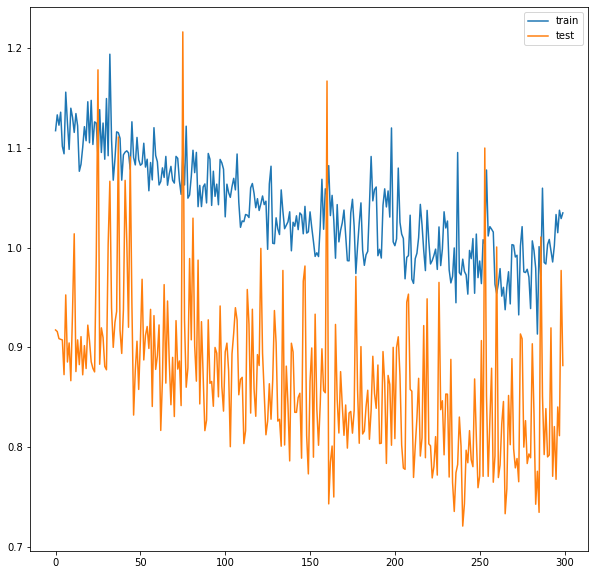

In [457]:
history_mlp_8 = MLP_8.fit(X_train["mlp"][8], y_train["mlp"][8], epochs=300, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_mlp_8.history['loss'], label='train')
plt.plot(history_mlp_8.history['val_loss'], label='test')
plt.legend()
plt.show()

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          B3    1.00000   0.38043   0.55118        92
          B2    0.56522   0.54167   0.55319       120
          B1    1.00000   0.01471   0.02899       136
          B0    0.95876   0.60390   0.74104       154
          S0    0.64607   0.77181   0.70336       149
          S1    0.00000   0.00000   0.00000       134
          S2    0.50685   0.28462   0.36453       130
          S3    1.00000   0.41573   0.58730        89

   micro avg    0.71375   0.38247   0.49805      1004
   macro avg    0.70961   0.37661   0.44120      1004
weighted avg    0.69186   0.38247   0.43786      1004
 samples avg    0.38247   0.38247   0.38247      1004

Confusion matrix, without normalization
[[ 42  50   0   0   0   0   0   0]
 [ 54  65   0   1   0   0   0   0]
 [133   0   2   1   0   0   0   0]
 [ 61   0   0  93   0   0   0   0]
 [ 32   0   0   2 115   0   0   0]
 [ 71   0   0   0  63   0   0   0]
 [ 92   0   0   0   0   1  37   0]
 [ 16   0 

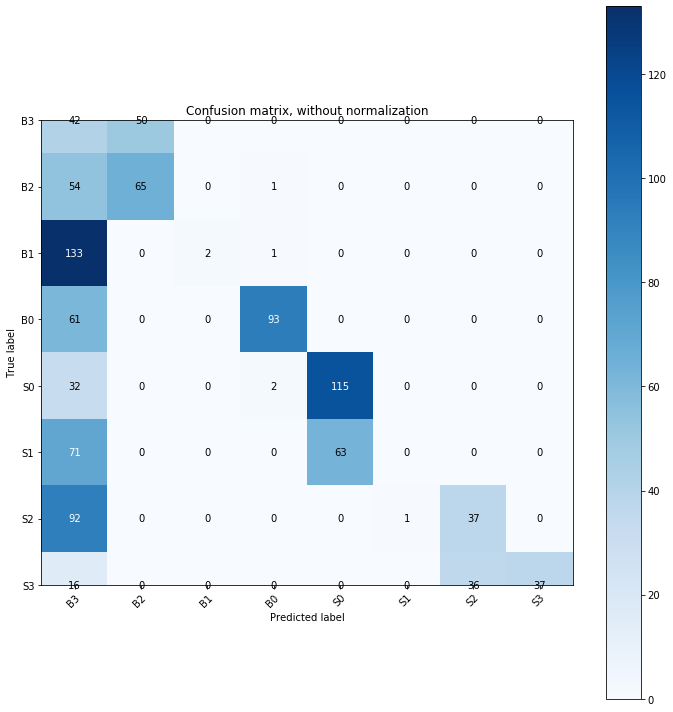

In [477]:
preds["mlp"][8] = MLP_8.predict(X_test["mlp"][8], batch_size=batch_size)
print(classification_report(y_test["mlp"][8], np.rint(preds["mlp"][8]), target_names=eight_dict.keys(), digits=5))
conf = plot_confusion_matrix(y_test["mlp"][8].argmax(axis=1), np.rint(preds["mlp"][8]).argmax(axis=1), classes=np.array(list(eight_dict.keys())))

In [ ]:
history_lstm_2 = LSTM_2.fit(X_train["lstm"][2], y_train["lstm"][2], epochs=200, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_lstm_2.history['loss'], label='train')
plt.plot(history_lstm_2.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
preds["lstm"][2] = LSTM_2.predict(X_test["lstm"][2], batch_size=batch_size)
print(classification_report(y_test["lstm"][2], np.rint(preds["lstm"][2]).astype(np.int64), target_names=["S","B"], digits=5))
conf = plot_confusion_matrix(y_test["lstm"][2], np.rint(preds["lstm"][2]).astype(np.int64), classes=np.array(["S","B"]))

In [ ]:
history_lstm_8 = LSTM_8.fit(X_train["lstm"][8], y_train["lstm"][8], epochs=300, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_lstm_8.history['loss'], label='train')
plt.plot(history_lstm_8.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
preds["lstm"][8] = LSTM_8.predict(X_test["lstm"][8], batch_size=batch_size)
print(classification_report(y_test["lstm"][8], np.rint(preds["lstm"][8]).astype(np.int64), target_names=eight_dict.keys(), digits=5))
conf = plot_confusion_matrix(y_test["lstm"][8].argmax(axis=1), np.rint(preds["lstm"][8]).argmax(axis=1), classes=np.array(list(eight_dict.keys())))